In [3]:
import torchvision.transforms as transforms
from question8 import cnn
from torchvision.transforms import GaussianBlur, ToTensor, RandomPerspective

In [4]:
transform = transforms.Compose([ToTensor()])

transform2 = transforms.Compose([
 GaussianBlur(kernel_size=3),
 ToTensor()
])
transform3 = transforms.Compose([
    ToTensor(),
    RandomPerspective(distortion_scale=0.5, p=0.5)
])

all_transforms = [transform, transform2, transform3]

results = []
for transform_ in all_transforms:

    results.append(cnn(transform=transform_))

Using device: mps
Epoch 1/10, loss: 1.589, accuracy: 0.875, time: 27.529556 seconds
Epoch 1, val accuracy: 0.968
Epoch 2/10, loss: 1.486, accuracy: 0.976, time: 24.238810 seconds
Epoch 2, val accuracy: 0.980
Epoch 3/10, loss: 1.480, accuracy: 0.981, time: 24.221080 seconds
Epoch 3, val accuracy: 0.981
Epoch 4/10, loss: 1.477, accuracy: 0.984, time: 24.954268 seconds
Epoch 4, val accuracy: 0.982
Epoch 5/10, loss: 1.476, accuracy: 0.986, time: 25.202400 seconds
Epoch 5, val accuracy: 0.983
Epoch 6/10, loss: 1.474, accuracy: 0.987, time: 24.936203 seconds
Epoch 6, val accuracy: 0.984
Epoch 7/10, loss: 1.475, accuracy: 0.987, time: 24.665620 seconds
Epoch 7, val accuracy: 0.980
Epoch 8/10, loss: 1.474, accuracy: 0.987, time: 23.938440 seconds
Epoch 8, val accuracy: 0.985
Epoch 9/10, loss: 1.473, accuracy: 0.988, time: 23.339066 seconds
Epoch 9, val accuracy: 0.987
Epoch 10/10, loss: 1.473, accuracy: 0.989, time: 21.873721 seconds
Epoch 10, val accuracy: 0.984
Using device: mps
Epoch 1/10, 

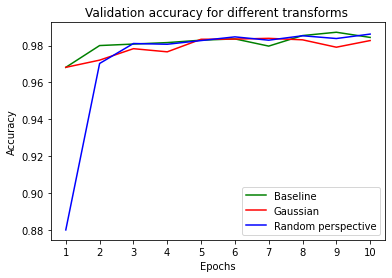

In [5]:
import matplotlib.pyplot as plt
baseline_acc = results[0]['accuracy']
gaussian_acc = results[1]['accuracy']
random_perspective_acc = results[2]['accuracy']

epochs = results[0]['epoch']
epochs = [str(epoch) for epoch in epochs]

plt.plot(epochs, baseline_acc, 'g', label= 'Baseline')
plt.plot(epochs, gaussian_acc, 'r', label= 'Gaussian')
plt.plot(epochs, random_perspective_acc, 'b', label='Random perspective')
plt.title('Validation accuracy for different transforms ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Images/acc_transforms.png')
plt.show()

Using device: mps
Using device: mps
Using device: mps


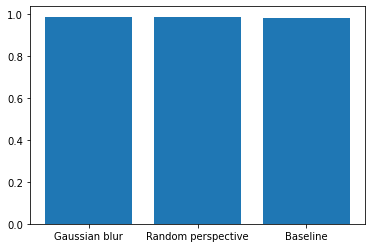

In [8]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from question8 import evaluate, get_device, get_batch_size
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

model_paths = ['models/cnn_mnist_gaussian_blur.pt', 'models/cnn_mnist_random_perspective.pt', 'models/cnn_mnist_to_tensor.pt']
path_dataset = 'MNIST_dataset'
test = torchvision.datasets.MNIST(root=path_dataset, train=False, download=True, transform=ToTensor())
batch_size = get_batch_size()
test_set = DataLoader(test, batch_size=batch_size)
accuracies = []

for model_path in model_paths:
    model = torch.load(model_path)
    accuracy, loss = evaluate(
        test_set=test_set,
        cnn=model,
        criterion=nn.CrossEntropyLoss(),
        device=get_device(),
        batch_size=batch_size
    )
    accuracies.append(accuracy)

fig = plt.figure()
bars = ('Gaussian blur', 'Random perspective', 'Baseline')
y_pos = np.arange(len(bars))

plt.bar(y_pos, accuracies)
plt.xticks(y_pos, bars)
plt.savefig('Images/acc_transforms_test_bar.png')
plt.show()

In [9]:
accuracies

[0.986, 0.9886, 0.9848]